# VolMIP data Canadian model

In [14]:
ds_disk = xr.open_dataset(r"C:\Users\johnk\Documents\git\jresearch\courses\climate\ta_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")

print(ds_disk)

<xarray.Dataset>
Dimensions:    (time: 60, bnds: 2, plev: 19, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 1991-06-16 00:00:00 ... 1996-05-16 12:00:00
  * plev       (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ta         (time, plev, lat, lon) float32 ...
Attributes: (12/53)
    CCCma_model_hash:            471ba52ed7724b3d05fbaf6cb797b01205e11114
    CCCma_parent_runid:          pinatubo-rs
    CCCma_pycmor_hash:           ca07acd23394361c8939a1f032c795b92ec4583f
    CCCma_runid:                 pin-full-09
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1991:06:01:00
    ...               

<xarray.DataArray 'od550csaer' (time: 120, lat: 64, lon: 128)>
[983040 values with dtype=float32]
Coordinates:
  * time        (time) object 2015-01-16 12:00:00 ... 2024-12-16 12:00:00
  * lat         (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon         (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    wavelength  float64 ...
Attributes:
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol_parti...
    long_name:      Ambient Aerosol Optical Thickness at 550nm
    comment:        AOD from the ambient aerosols in clear skies if od550aer ...
    units:          1
    original_name:  ODST
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-01T18:10:37Z altered by CMOR: Treated scalar dime...
1
(64,)
<xarray.DataArray 'od550csaer' ()>
array(0.13269526, dtype=float32)
Coordinates:
    wavelength  float64 ...


ValueError: the first argument to .resample must be a dictionary

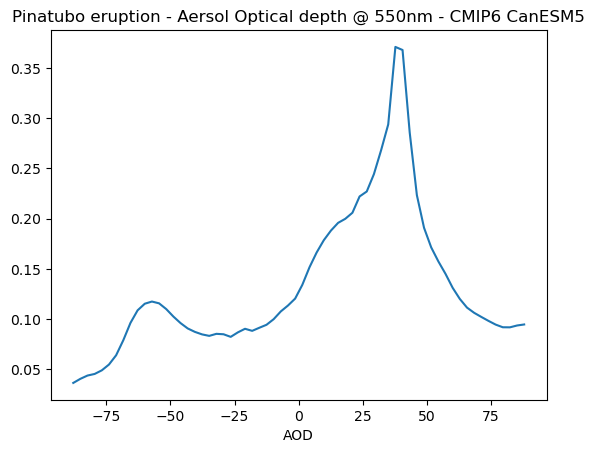

In [17]:
aero = xr.open_dataset(r"C:\Users\johnk\repos\assignments\od550csaer_AERmon_CanESM5_dcppC-forecast-addPinatubo_s2014-r9i1p2f1_gn_201501-202412.nc")
print(aero.od550csaer)
coslat = np.cos(np.deg2rad(ds_disk.lat))
weight_factor = 1 # coslat / coslat.mean(dim='lat') 
#  Want to see what we just created?
print(weight_factor)
aero_dat = aero.od550csaer.mean(dim=('time', 'lon'))
plt.plot(aero.lat, aero_dat)
plt.title('Pinatubo eruption - Aersol Optical depth @ 550nm - CMIP6 CanESM5')
# plt.xlabel('Latitude')
plt.xlabel('AOD')
print(aero_dat.shape)
print(aero.od550csaer.mean(dim=('time', 'lat', 'lon')))
# print(state.Tatm.shape, aero_dat.resample(60).shape)

In [ ]:
ar = (ds_disk.ta * weight_factor).mean(dim=('time', 'lon'))
print(ar.shape)
fig, ax = plt.subplots(1,1,figsize=(14,10))
# ax = axes[0,0]
field = ar
cax = ax.contourf(ds_disk.ta.lat, ds_disk.ta.plev * 1e-2, field)
ax.set_title('Pinatubo eruption - Atmosphere temerpature - CMIP6 CanESM5')
ax.set_xlabel('Latitude')
ax.set_ylabel('hPa')
ax.invert_yaxis()
fig.colorbar(cax, ax=ax)

In [ ]:
t_surface = xr.open_dataset(r"C:\Users\johnk\repos\assignments\ts_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")

print(t_surface.ts)
ts_dat = t_surface.ts.mean(dim=('time', 'lon'))
plt.plot(ts_dat.lat, ts_dat)
plt.title('Pinatubo eruption - Surface Temperature - CMIP6 CanESM5')
plt.xlabel('Latitude')
plt.ylabel('Degree Kelvin (K)')
print(ts_dat.shape)
print(t_surface.ts.mean(dim=('time', 'lat', 'lon')))

In [ ]:
olr = xr.open_dataset(r"C:\Users\johnk\repos\assignments\rlut_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")
asr = xr.open_dataset(r"C:\Users\johnk\repos\assignments\rsdt_Amon_CanESM5_volc-pinatubo-full_r9i1p2f1_gn_199106-199605.nc")

print(asr.rsdt)
olr_dat = olr.rlut.mean(dim=('time', 'lon'))
asr_dat = asr.rsdt.mean(dim=('time', 'lon'))
plt.plot(olr_dat.lat, olr_dat, 'g')
plt.plot(asr_dat.lat, asr_dat, 'orange')
plt.plot(asr_dat.lat, asr_dat - olr_dat, 'b')
plt.title('Pinatubo eruption - OLR, ASR - CMIP6 CanESM5')
plt.xlabel('Latitude')
plt.ylabel('W/m2')
print(olr_dat.shape)
print(olr.rlut.mean(dim=('time', 'lat', 'lon')))

# Advanced Model

A 2D EBM model based of Lab 29. Added the ability to inject aersol at defined hieghts 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import climlab
from climlab import constants as const

def inferred_heat_transport( energy_in, lat_deg ):
    '''Returns the inferred heat transport (in PW) by integrating the net energy imbalance from pole to pole.'''
    from scipy import integrate
    from climlab import constants as const
    lat_rad = np.deg2rad( lat_deg )
    return ( 1E-15 * 2 * np.math.pi * const.a**2 * 
            integrate.cumtrapz( np.cos(lat_rad)*energy_in,
            x=lat_rad, initial=0. ) )

### Create plotting function

In [2]:
def plot_results(model):
    
    ticks = [-90, -60, -30, 0, 30, 60, 90]
    fig, axes = plt.subplots(2,2,figsize=(14,10))
    ax = axes[0,0]
    ax.plot(model.lat, model.timeave['Ts'])
    # ax.set_title('Surface temperature (Aerosol + Clouds)')
    # ax.set_title('Surface temperature (Aerosol @ 810 hPa + Clouds)')
    ax.set_title('Surface temperature (Aerosol @ 210 hPa + Clouds)')
    # ax.set_title('Surface temperature (Aerosol + Clear sky)')
    ax.set_ylabel('K')

    ax2 = axes[0,1]
    field = (model.timeave['Tatm']).transpose()
    cax = ax2.contourf(model.lat, model.lev, field)
    ax2.invert_yaxis()
    fig.colorbar(cax, ax=ax2)
    # ax2.set_title('Atmospheric temperature (Aerosol + Clear sky)');
    # ax2.set_title('Atmospheric temperature (Aerosol + Clouds)')
    # ax2.set_title('Atmospheric temperature (Aerosol @ 810 hPa + Clouds)')
    ax2.set_title('Atmospheric temperature (Aerosol @ 210 hPa + Clouds)')
    ax2.set_ylabel('hPa')

    ax3 = axes[1,0]
    ax3.plot(model.lat, model.timeave['LHF'], label='LHF')
    ax3.plot(model.lat, model.timeave['SHF'], label='SHF')
    # ax3.set_title('Surface heat flux (Aerosol + Clouds)')
    # ax3.set_title('Surface heat flux (Aerosol + clear sky)')
    # ax3.set_title('Surface heat flux (Aerosol @ 810 hPa + Clouds)')
    ax3.set_title('Surface heat flux (Aerosol @ 210 hPa + Clouds)')

    ax3.set_ylabel('W/m2')
    ax3.legend();

    ax4 = axes[1,1]
    Rtoa = np.squeeze(model.timeave['ASR'] - model.timeave['OLR'])
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    ax4.plot(model.lat, Rtoa)
    ax4.plot(model.lat, model.timeave['ASR'])
    ax4.plot(model.lat, model.timeave['OLR'])
    # ax4.plot(model.lat, inferred_heat_transport(Rtoa, model.lat))
    # ax4.set_title('ASR, OLR (Aerosol + Clear sky)')
    # ax4.set_title('ASR, OLR (Aerosol @ 810 hPa + Clouds)')
    ax4.set_title('ASR, OLR (Aerosol @ 210 hPa + Clouds)')
    ax4.legend(['ASR-OLR', 'ASR', 'OLR'])
    ax4.set_ylabel('PW')

    for ax in axes.flatten():
        ax.set_xlim(-90,90); ax.set_xticks(ticks)
        ax.set_xlabel('Latitude'); ax.grid();

    print(f"\n\n equilibrium:           {(model.ASR - model.OLR)[0]}")


### Create the 2D domain

In [3]:
# A two-dimensional domain
num_lev = 50
state = climlab.column_state(num_lev=num_lev, num_lat=60, water_depth=10.)
lev = state.Tatm.domain.axes['lev'].points
print(lev.shape)

(50,)


## Clouds

To make the simulation closer to reality, the model incorporates clouds at a few levels of the atmosphere.

In [4]:
#  Define two types of cloud, high and low
cldfrac = np.zeros_like(state.Tatm)
r_liq = np.zeros_like(state.Tatm)
r_ice = np.zeros_like(state.Tatm)
clwp = np.zeros_like(state.Tatm)
ciwp = np.zeros_like(state.Tatm)

#   indices
high = 10  # corresponds to 210 hPa
low = 40   #  corresponds to 810 hPa

#  A high, thin ice layer (cirrus cloud)
r_ice[:,high] = 14. # Cloud ice crystal effective radius (microns)
ciwp[:,high] = 10.  # in-cloud ice water path (g/m2)
cldfrac[:,high] = 0.322

#  A low, thick, water cloud layer (stratus)
r_liq[:,low] = 14.  # Cloud water drop effective radius (microns)
clwp[:,low] = 100.  # in-cloud liquid water path (g/m2)
cldfrac[:,low] = 0.21

# wrap everything up in a dictionary
cloud_parameter = {'cldfrac': cldfrac,
                   'ciwp': ciwp,
                   'clwp': clwp,
                   'r_ice': r_ice,
                   'r_liq': r_liq}

#### Plot clouds in the column

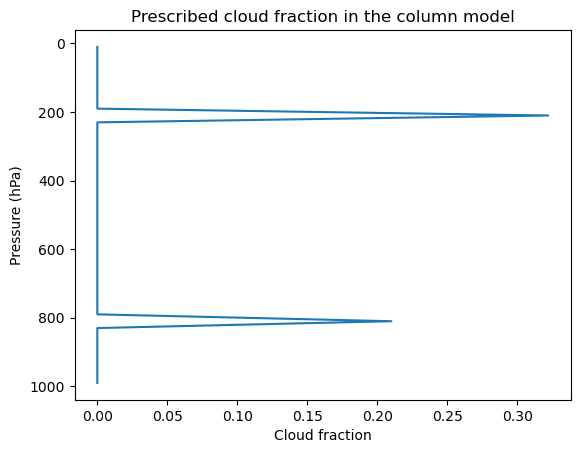

In [5]:
plt.plot(cldfrac[0,:], lev)
plt.gca().invert_yaxis()
plt.ylabel('Pressure (hPa)')
plt.xlabel('Cloud fraction')
plt.title('Prescribed cloud fraction in the column model')
plt.show()

## Aerosols

To simulate the effects of volcanoes and the impact we use the aersols to simulate an eruption event

In [6]:
#  Define two types of aerosol injections, high and low
aerosol_optical_depth = np.zeros_like(state.Tatm)

#   indices
high = 10  # corresponds to 210 hPa
low = 40   #  corresponds to 810 hPa

#  A high, aerosol injection
aerosol_optical_depth[:,high] = 0.13
aerosol_optical_depth[:,high + 1] = 0.13

#  A low, aerosol injection height
# aerosol_optical_depth[:,low] = 0.35
# aerosol_optical_depth[:,low + 1] = 0.35

aerosol_scatter_albedo = np.zeros_like(state.Tatm)

aerosol_scatter_albedo[:,high] = 0.1
aerosol_scatter_albedo[:,high + 1] = 0.1
# aerosol_scatter_albedo[:,low] = 0.1
# aerosol_scatter_albedo[:,low + 1] = 0.1

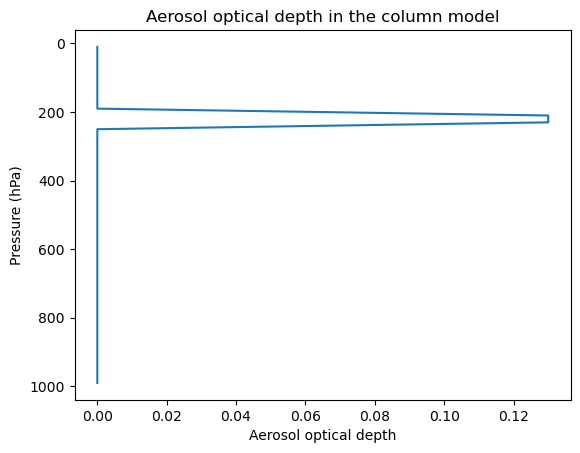

In [7]:
plt.plot(aerosol_optical_depth[0,:], lev)
plt.gca().invert_yaxis()
plt.ylabel('Pressure (hPa)')
plt.xlabel('Aerosol optical depth')
plt.title('Aerosol optical depth in the column model')
plt.show()

## Build the model

Build the base model for the starting climate

In [8]:
#  The top-level model
model_base = climlab.TimeDependentProcess(state=state, name='Radiative-Convective-Diffusive Model')
#  Specified relative humidity distribution
h2o = climlab.radiation.ManabeWaterVapor(state=state)
#  Hard convective adjustment for ATMOSPHERE ONLY (not surface)
conv = climlab.convection.ConvectiveAdjustment(state={'Tatm':model_base.state['Tatm']},
                                               adj_lapse_rate=6.5,
                                               **model_base.param)
#  Annual mean insolation as a function of latitude and time of year
sun = climlab.radiation.DailyInsolation(domains=model_base.Ts.domain)

rad = climlab.radiation.RRTMG(name='Radiation',
                              state=state, 
                              specific_humidity=h2o.q,
                              timestep = climlab.constants.seconds_per_day,
                              albedo = 0.125,
                              insolation=sun.insolation,
                              coszen=sun.coszen,
                              tauaer_sw=aerosol_optical_depth,
                              ssaaer_sw=aerosol_scatter_albedo,
#                               ecaer_sw=aerosol_optical_depth
                              **cloud_parameter
                             )
rad.subprocess['SW'].iaer=0,

model_base.add_subprocess('Radiation + Aerosol', rad)
model_base.add_subprocess('Insolation', sun)
model_base.add_subprocess('WaterVapor', h2o)
model_base.add_subprocess('Convection', conv)

from climlab.dynamics import MeridionalDiffusion

# thermal diffusivity in W/m**2/degC
D = 0.04
# meridional diffusivity in m**2/s
K = D / model_base.Tatm.domain.heat_capacity[0] * const.a**2
d = MeridionalDiffusion(state={'Tatm': model_base.state['Tatm']}, 
                        K=K, **model_base.param)
model_base.add_subprocess('Diffusion', d)

#  Add surface heat fluxes
shf = climlab.surface.SensibleHeatFlux(state=model_base.state, Cd=0.5E-3)
lhf = climlab.surface.LatentHeatFlux(state=model_base.state, Cd=0.5E-3)
# set the water vapor input field for LHF
lhf.q = h2o.q
model_base.add_subprocess('SHF', shf)
model_base.add_subprocess('LHF', lhf)


C:\Users\johnk\AppData\Local\miniconda3\envs\climphys\lib\site-packages\climlab\radiation\radiation.py:156: UserWarning: Some grid points are beyond the bounds of the ozone file. Ozone values will be extrapolated.
  warnings.warn('Some grid points are beyond the bounds of the ozone file. Ozone values will be extrapolated.')


In [9]:
model_base.integrate_years(3.)

#  One more year to get annual-mean diagnostics
model_base.integrate_years(1.)

Integrating for 1095 steps, 1095.7266 days, or 3.0 years.
Total elapsed time is 2.998010635134713 years.
Integrating for 365 steps, 365.2422 days, or 1.0 years.
Total elapsed time is 3.997347513512951 years.




 equilibrium:           [158.59026309]


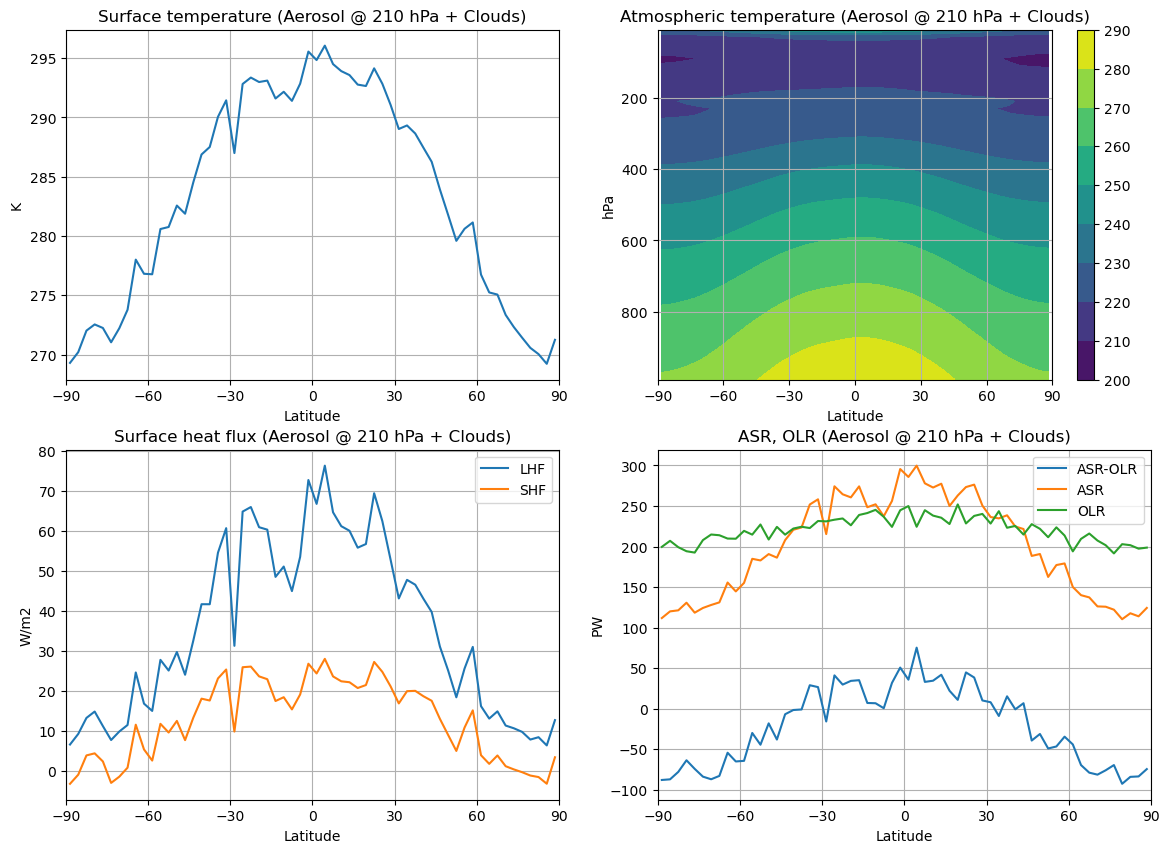

In [10]:
plot_results(model_base)

## Volcano eruption

Hit the model with an eruption of SO4 injected to stratoshpere (810 kPa)

Integrating for 365 steps, 365.2422 days, or 1.0 years.
Total elapsed time is 4.996684391891189 years.


 equilibrium:           [153.62736839]


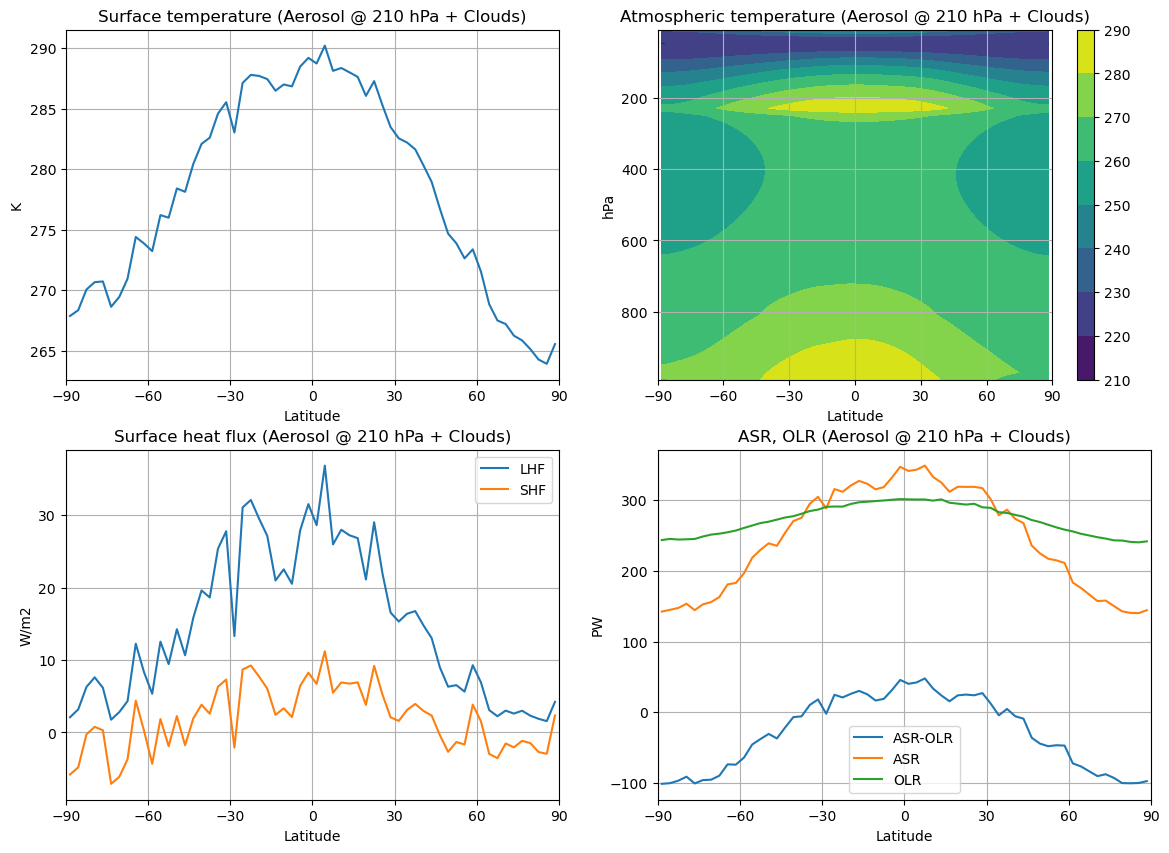

In [11]:
model_volcano = climlab.process_like(model_base)

model_volcano.subprocess['Radiation + Aerosol'].subprocess['SW'].iaer=10
model_volcano.subprocess['Radiation + Aerosol'].tauaer_sw = aerosol_optical_depth
model_volcano.subprocess['Radiation + Aerosol'].subprocess['SW'].ssaaer_sw=aerosol_scatter_albedo
model_volcano.integrate_years(1.)
    
plot_results(model_volcano)

plt.show()

# # decrease and proceed
# aerosol_optical_depth[:,low] = 0.26
# aerosol_optical_depth[:,low + 1] = 0.26
# model_volcano.subprocess['Radiation + Aerosol'].tauaer_sw = aerosol_optical_depth

# model_volcano.integrate_years(1.)

# # decrease and proceed
# aerosol_optical_depth[:,low] = 0.22
# aerosol_optical_depth[:,low + 1] = 0.22
# model_volcano.subprocess['Radiation + Aerosol'].tauaer_sw = aerosol_optical_depth

# model_volcano.integrate_years(1.)

# plot_results(model_volcano)

# plt.show()

## Remove Aerosols

Remove aerosols and run to equilibrium

In [ ]:
model_remove = climlab.process_like(model_volcano)
model_remove.subprocess['Radiation + Aerosol'].subprocess['SW'].iaer=0
model_remove.subprocess['Radiation + Aerosol'].tauaer_sw = np.zeros_like(aerosol_optical_depth)
model_remove.integrate_years(4.)
    
plot_results(model_remove)